Abgabe 2 Mark Nagengast Porro, Tim Schwabe

Aufgabe 1

In [1]:
import networkx as nx
import numpy as np
import matplotlib as plt
import operator

np.random.seed(10)

In [2]:
alpha = 1
pop_size = 20

In [3]:
def createGraph(n_nodes, n_edges):
    G = nx.Graph()
    G.add_nodes_from([i for i in range(0,n_nodes)])

    for n in range(n_edges):
        a = np.random.randint(n_nodes)
        while True:
            b = np.random.randint(n_nodes)
            if a != b:
                break
        G.add_edge(a,b)
    
    return G


G = createGraph(10,20)


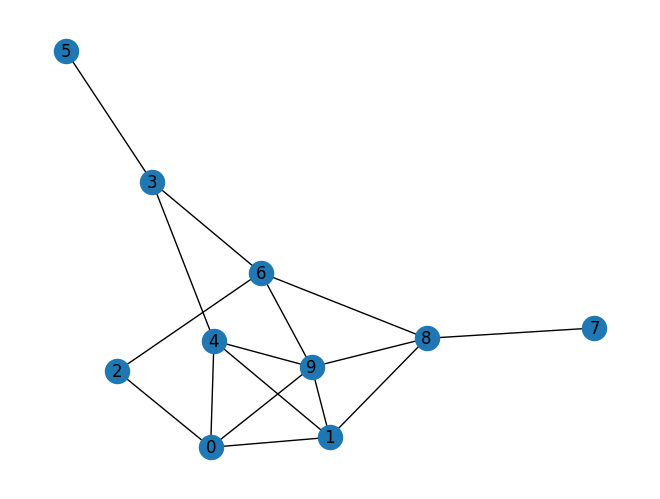

In [4]:
nx.draw(G, with_labels = True)

Aufgabe 2

In [5]:
def init_population(G):
    dic = dict()
    for i in range(0, pop_size):
        a = np.random.randint(G.number_of_nodes())
        while True:
            b = np.random.randint(G.number_of_nodes())
            if a != b:
                break
        dic.update([((a,b),0)])
    return dic

In [6]:
def fitness(population, G):
    fitness = 0

    for key in population:
        fitness = 0
        for i in range(len(key)-1):
            for j in range(i+1,len(key)):
                if G.has_edge(key[i], key[j]):
                    fitness += 1
                else: 
                    fitness -= alpha*len(key)
        population.update([(key, fitness)])


Aufgabe 3

In [7]:
# Selektion
def selection(population):
    return dict(sorted(population.items(),key=operator.itemgetter(1),reverse=True)[:10])


In [8]:
# Rekombination
def recombination(pop):
    new_pop = dict()
    for i in range(len(pop)-1):
        for j in range(i+1,len(pop)):
            appended = list(set(list(pop)[i] + list(pop)[j]))
            while len(appended) > max(len(list(pop)[i]), len(list(pop)[j])) + 1:
                random_idx = np.random.choice(len(appended))
                del appended[random_idx]
            appended = tuple(appended)
            new_pop.update([(appended,0)])
    return new_pop

In [9]:
#Mutation:
def mutation(dic,G):
    newDic = dict()
    for key in dic:
        newKey = list(key)
        #removing nodes
        for node in newKey:
            if np.random.rand(1) < 0.05:
                newKey.remove(node)
        #adding nodes
        for node in G.nodes():
            if np.random.rand(1) < 0.02:
                newKey.append(node)
        newDic.update([(tuple(set(newKey)),0)])
    
    return newDic

In [10]:
population = init_population(G)
repeat_c = 0
best_value = -100
while True:
    fitness(population,G)
    population = selection(population)
    tmp = population.get(list(population)[0])
    if(tmp == best_value):
        repeat_c += 1
    else:
        best_value = tmp

    if repeat_c > 5:
        break


    childs = mutation(recombination(population),G)
    population = population | childs

population

{(0, 9, 4, 1): 6,
 (0, 1, 4, 9): 6,
 (8, 9, 1): 3,
 (8, 1, 9): 3,
 (0, 9, 1): 3,
 (0, 1, 9): 3,
 (0, 9, 4): 3,
 (0, 1, 4): 3,
 (1, 4, 9): 3,
 (9, 4, 1): 3}